<a href="https://colab.research.google.com/github/RiviereKevin/money_laundering/blob/Code%26Model/money_launderingdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a model to detect money laundering using the features of a transaction.
Generate a confusion matrix, recall and Precision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/ML.csv')

In [ ]:
data.head(5)

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 


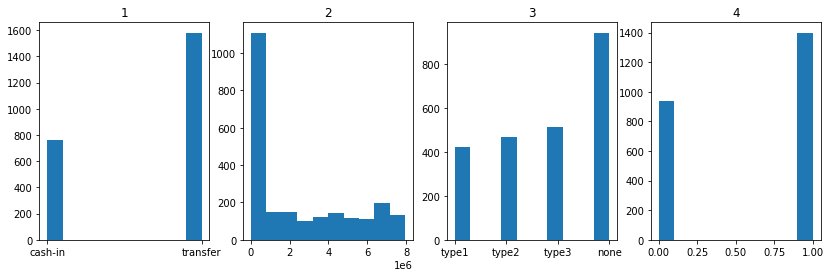

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

# Plot data on each subplot
axs[0].hist(data['typeofaction'])
axs[1].hist(data['amountofmoney'])
axs[2].hist(data['typeoffraud'])
axs[3].hist(data['isfraud'])

# Set title for each subplot
axs[0].set_title('1')
axs[1].set_title('2')
axs[2].set_title('3')
axs[3].set_title('4')

# Display the plot
plt.show()

In [ ]:
# Group the data by isfraud and typeoffraud
grouped_data = data.groupby(['isfraud', 'typeoffraud']).size().reset_index(name='count')
print(grouped_data)

   isfraud typeoffraud  count
0        0        none    941
1        1       type1    423
2        1       type2    465
3        1       type3    511


Fraud type 1,2,3 = 1399
none = 941

<ipython-input-123-71f3e7dc4241>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['amountofmoney'])


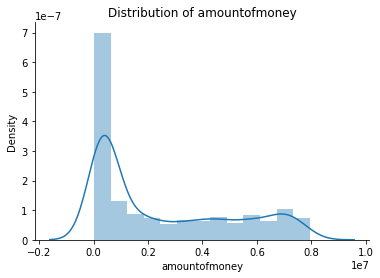

In [ ]:
sns.distplot(data['amountofmoney'])
plt.title("Distribution of amountofmoney")
sns.despine()

Transfer appears to be the most used in this dataset,in addition of that we can see that type3 of fraud is the most occurent. Finnaly, the data shows high consentration of small amount of money.

In [ ]:
# Convert the date column to Pandas datetime type
data['date'] = pd.to_datetime(data['date'])
# Group the data by date and day of the week
grouped_data1 = data.groupby([data['date'].dt.date.rename('date_col'), data['date'].dt.dayofweek, 'isfraud' ]).size().reset_index(name='transaction_count')
fraud_data = grouped_data1[grouped_data1['isfraud'] == 1]
# Display the fraud data
print(fraud_data)

       date_col  date  isfraud  transaction_count
1    2019-02-20     2        1                  1
3    2019-02-21     3        1                 13
5    2019-02-22     4        1                  8
7    2019-02-23     5        1                  9
9    2019-02-24     6        1                  7
..          ...   ...      ...                ...
293  2019-07-16     1        1                  8
295  2019-07-17     2        1                  7
297  2019-07-18     3        1                 10
299  2019-07-19     4        1                  8
301  2019-07-20     5        1                  6

[151 rows x 4 columns]


Text(0, 0.5, 'Frequency')

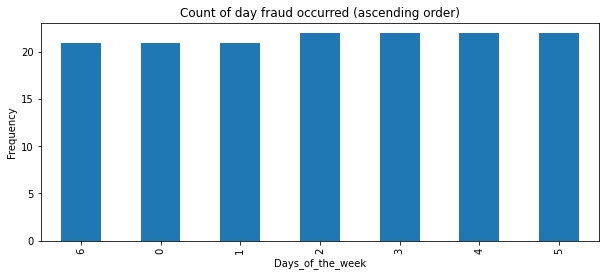

In [ ]:
ax = fraud_data['date'].value_counts().sort_values().plot(kind='bar',
                                    figsize=(10,4),
                                    title="Count of day fraud occurred (ascending order)")
ax.set_xlabel("Days_of_the_week")
ax.set_ylabel("Frequency")


Here I want to illustrate if wheater or not we have more fraud on specific day of the week it start on monday = 0 and sunday = 6
On the graph we see that, fraud most occurs on Saturday and Friday (end of the week)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# One-Hot Encode categorical features
cat_features = ['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'date', 'typeoffraud']
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data[cat_features])
encoded_features = enc.transform(data[cat_features]).toarray()
data.drop(cat_features, axis=1, inplace=True)
data = pd.concat([data, pd.DataFrame(encoded_features)], axis=1)

In [ ]:
# Split the data into training and testing sets
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

In [ ]:
data.shape

(2340, 6708)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Columns: 6708 entries, isfraud to 6706
dtypes: float64(6707), int64(1)
memory usage: 119.8 MB


In [ ]:
X = data.drop(['isfraud'], axis = 'columns')
Label_Data = data['isfraud']

In [ ]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(data['isfraud'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(data['isfraud'] == label)[0]

Counter({1: 1399, 0: 941})


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Label_Data, test_size=0.2, random_state=42)


In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Train a logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
# Predict the test data
y_pred = clf.predict(X_test)

Recall: 1.0
Precision: 1.0


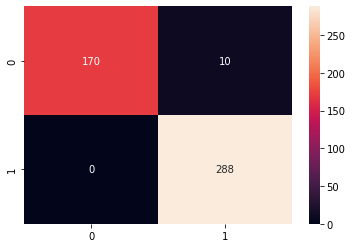

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
# Calculate recall and precision
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_test)
print("Recall:", recall)
print("Precision:", precision)

To go further we can print the F1 score :

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.9829351535836178


Due to high score, we might check for overfitting ?

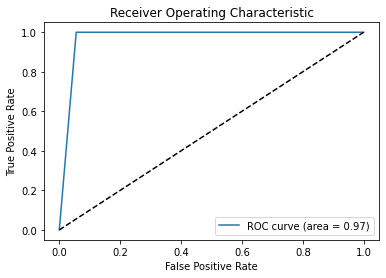

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()